In [32]:
# Importing all imports 
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.datasets import imdb
from keras.layers import Dense, Dropout, Flatten.LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from datetime import datetime
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from __future__ import print_function
import keras
from keras import backend as K
from numpy import mean
from numpy import std
from numpy import dstack
from matplotlib import pyplot
from keras.utils import to_categorical
import itertools
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels import robust
from scipy.stats import *
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import zipfile
import os
from scipy import fftpack
import warnings
warnings.filterwarnings('ignore')
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

In [33]:
data=pd.read_csv("x_train.csv")
c=list(data.columns)
y=list(pd.read_csv("y_train.csv")['surface'])
data.drop(['row_id', 'series_id','measurement_number'], axis = 1,inplace=True)

final_feat1=[]
for i in range(0,3810):
    df=data[(i*128):(i*128)+128]
    final_feat1.append(df.to_numpy())
final_feat1_array=np.array(final_feat1)

from sklearn.model_selection import train_test_split
le = preprocessing.LabelEncoder()
le.fit(y)
unique_labels=le.classes_
encoded_y=le.transform(y)
le_class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_class_mapping)

X_train, X_test, y_train, y_test = train_test_split(final_feat1_array, encoded_y, test_size=0.3, random_state=42,stratify=encoded_y)

import keras
num_classes=9
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

{'carpet': 0, 'concrete': 1, 'fine_concrete': 2, 'hard_tiles': 3, 'hard_tiles_large_space': 4, 'soft_pvc': 5, 'soft_tiles': 6, 'tiled': 7, 'wood': 8}


In [34]:
ACTIVITIES = {
    0: 'carpet',
    1: 'concrete',
    2: 'fine_concrete',
    3: 'hard_tiles',
    4: 'hard_tiles_large_space',
    5: 'soft_pvc',
    6: 'soft_tiles',
    7: 'tiled',
    8: 'wood'
}
X_train, X_test, Y_train, Y_test=X_train, X_test, y_train, y_test

### Data

In [35]:
# Importing tensorflow
np.random.seed(7)
import tensorflow as tf
tf.set_random_seed(7)

# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

# Import Keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [36]:
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

epochs = 30
batch_size = 64
n_hidden = 32

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
10
2667


 <h2>HYPER PARAMETER TUNING : Architecture-1 : 1-Layers LSTM</h2>
 <h2>LSTM1() - Dense(output) ->> Rmsprop+Dropout()</h2>

In [6]:
# Function to create model, required for KerasClassifier
start = datetime.now()

def create_model(neurons=1,dropout_rate=0.0):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(timesteps, input_dim)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_classes, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=80, batch_size=64, verbose=2)

# define the grid search parameters
neurons = [30, 60, 75, 100]
dropout_rate = [0.2, 0.4, 0.6, 0.8]

param_grid = dict(neurons=neurons,dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=3)
grid_result = grid.fit(X_train, Y_train)

# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

print("--"*35)
print("Best Score: %f using param: %s" % (grid_result.best_score_, grid_result.best_params_))
print("--"*35)
print("Time taken to run this cell :", datetime.now() - start)
print("\n")
print(" MEAN ACC   STD ")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/80
 - 16s - loss: 2.0168 - acc: 0.2062
Epoch 2/80
 - 14s - loss: 1.8673 - acc: 0.3018
Epoch 3/80
 - 15s - loss: 1.7478 - acc: 0.3371
Epoch 4/80
 - 13s - loss: 1.6757 - acc: 0.3596
Epoch 5/80
 - 15s - loss: 1.6192 - acc: 0.3705
Epoch 6/80
 - 16s - loss: 1.5706 - acc: 0.3821
Epoch 7/80
 - 14s - loss: 1.5359 - acc: 0.3922
Epoch 8/80
 - 15s - loss: 1.5063 - acc: 0.3986
Epoch 9/80
 - 15s - loss: 1.4706 - acc: 0.4173
Epoch 10/80
 - 15s - loss: 1.4334 - acc: 0.4349
Epoch 11/80
 - 13s - loss: 1.4229 - acc: 0.4364
Epoch 12/80
 - 12s - loss: 1.3996 - acc: 0.4518
Epoch 13/80
 - 12s - loss: 1.3619 - acc: 0.4773
Epoch 14/80
 - 12s - loss: 1.3528 - acc: 0.4713
Epoch 15/80
 - 12s - loss: 1.3013 - acc: 0.4923
Epoch 16/80
 - 13s - loss: 1.2705 - acc: 0.5216
Epoch 17/80
 - 13s - loss: 1.2620 - acc: 0.5354
Epoch 18/80
 - 13s - loss: 1.2320 - acc: 0.5332
Epoch 19/80
 - 13s - loss: 1.2301 - acc: 0.5354
Epoch 20/80
 - 13s - loss: 1.1831 - acc: 0.5651
Epoch 21/80
 - 13s - loss: 1.1573 - acc: 0.5744
E

In [38]:
# refitting for best parameters.
start = datetime.now()
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(100, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.4))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))

# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training the model
model.fit(X_train,
          Y_train,verbose=2,
          batch_size=64,
          validation_data=(X_test, Y_test),
          epochs=60)

print("Time taken to run this cell :", datetime.now() - start)

Train on 2667 samples, validate on 1143 samples
Epoch 1/60
 - 10s - loss: 2.0168 - acc: 0.2062 - val_loss: 1.9238 - val_acc: 0.2826
Epoch 2/60
 - 7s - loss: 1.8664 - acc: 0.2988 - val_loss: 1.7635 - val_acc: 0.3438
Epoch 3/60
 - 7s - loss: 1.7389 - acc: 0.3356 - val_loss: 1.6365 - val_acc: 0.3788
Epoch 4/60
 - 7s - loss: 1.6725 - acc: 0.3630 - val_loss: 1.5696 - val_acc: 0.3893
Epoch 5/60
 - 8s - loss: 1.6127 - acc: 0.3712 - val_loss: 1.5693 - val_acc: 0.3876
Epoch 6/60
 - 9s - loss: 1.5822 - acc: 0.3806 - val_loss: 1.5200 - val_acc: 0.3885
Epoch 7/60
 - 8s - loss: 1.5611 - acc: 0.3900 - val_loss: 1.5692 - val_acc: 0.3692
Epoch 8/60
 - 9s - loss: 1.5191 - acc: 0.3937 - val_loss: 1.4701 - val_acc: 0.4121
Epoch 9/60
 - 9s - loss: 1.4861 - acc: 0.4207 - val_loss: 1.4560 - val_acc: 0.4409
Epoch 10/60
 - 9s - loss: 1.4262 - acc: 0.4387 - val_loss: 1.4974 - val_acc: 0.4252
Epoch 11/60
 - 10s - loss: 1.4111 - acc: 0.4499 - val_loss: 1.4894 - val_acc: 0.4479
Epoch 12/60
 - 9s - loss: 1.4196 - 

In [39]:
print("Performance on Test Data")
print("[Loss] = ",np.round(model.evaluate(X_test, Y_test,verbose=0)[0],4))
print("[Accuracy] = ",np.round(model.evaluate(X_test, Y_test,verbose=0)[1],4))

Performance on Test Data
[Loss] =  0.9572
[Accuracy] =  0.6833


- With a simple 1 layer LSTM architecture Raw data Signals we got 68.33% accuracy and a loss of 0.9572
- further Performance did not imporve for more deeper layers.

### Preparing features

In [10]:
#reading data
data=pd.read_csv("X_train.csv")
c=list(data.columns)
y=list(pd.read_csv("y_train.csv")['surface'])

#encoding labels
le = preprocessing.LabelEncoder()
le.fit(y)
unique_labels=le.classes_
encoded_y=le.transform(y)

# printing encoded label dictionary
le_class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_class_mapping)
# Engineeried features >>> [mean ,median, variance, std, maximum, minimum, 
#                           iqr, cov, skew, kurtosis, mad] of each signals

#function to extract statistical features 
def feature_extract(ar):
    mean=np.mean(ar)
    median=np.median(ar)
    variance=np.var(ar)
    std=np.std(ar)
    maximum=np.max(ar)
    minimum=np.min(ar)
    iqr=stats.iqr(ar)
    cov=stats.variation(ar)
    skew=stats.skew(ar)
    kurtosis=stats.kurtosis(ar)
    mad=robust.mad(ar)
    return [mean,median,variance,std,maximum,minimum,iqr,cov,skew,kurtosis,mad]

# preparing training data
final_feat=[]
for i in range(0,3810):
    df=data[(i*128):(i*128)+128]
    feat=[]
    for k in c[3:]:
        fe=feature_extract(df[k].to_numpy())
        for j in fe:
            feat.append(j)
    final_feat.append(feat)
    
#final data array
final_feat_array=np.array(final_feat)
# Reshaping data to feature extration 
X_train_data = pd.read_csv("X_train.csv")
def dataset_for_nn(X_dataset):
    num_samples = X_dataset.shape[0]//128
    X_dataset_for_nn = np.zeros((num_samples,128,10))
    for i in range(num_samples):
        subset = np.array(X_dataset.iloc[i*128:(i+1)*128,3:])
        X_dataset_for_nn[i,:,:] = subset
    return X_dataset_for_nn

X_train_for_nn = dataset_for_nn(X_train_data)

# computing fourier transform features of the data
def freqs(dataset,width):
    X = np.abs(fftpack.fft(dataset))
    squeezed_dataset = []
    for i in range(64//width):
        squeezed_dataset.append(np.mean(X[i*width:(i+1)*width]))
    return squeezed_dataset

# function to extract features
def X_features(X_dataset,width=3):
    num_samples = len(list(set(X_dataset["series_id"])))
    num_cols = 64//width
    features = np.zeros((num_samples,110+10*num_cols))
    for i in range(num_samples):
        X_train_subset = np.array(X_dataset.iloc[i*128:(i+1)*128,3:])
        for j in range(X_train_subset.shape[1]):
            features[i,110+j*num_cols:110+(j+1)*num_cols] = freqs(X_train_subset[:,j],width)
    return features

X_train_features = X_features(X_train_data)

# Merge statistical features and fourier transform features
for i in range(final_feat_array.shape[0]):
    for j in range(final_feat_array.shape[1]):
        X_train_features[i][j]=final_feat_array[i][j]
        
# perform train test split and standardization
X_train, X_test, y_train, y_test = train_test_split(X_train_features, encoded_y, test_size=0.3, random_state=42,stratify=encoded_y)
std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# printing size of train test data
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

import keras
num_classes=9
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

{'carpet': 0, 'concrete': 1, 'fine_concrete': 2, 'hard_tiles': 3, 'hard_tiles_large_space': 4, 'soft_pvc': 5, 'soft_tiles': 6, 'tiled': 7, 'wood': 8}
X_train and y_train : ((2667, 320),(2667,))
X_test  and y_test  : ((1143, 320),(1143,))


<h2>Architecture-2 : 1-Layers LSTM</h2>
<h2>LSTM1(40) - Dense(output) ->> Adam+Dropout(0.2)</h2>

In [39]:
import warnings
warnings.filterwarnings('ignore')
a=X_train.reshape((2667,1,320))
b=X_test.reshape((1143,1,320))

start = datetime.now()
model = Sequential()
model.add(LSTM(40, input_shape=(1,320)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.3, min_lr=0.00001)

mc = ModelCheckpoint('dynamic_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

hist=model.fit(a,y_train,verbose=2,batch_size=128,validation_data=(b, y_test),
               callbacks=[learning_rate_reduction,mc],shuffle=True,epochs=1000)
# evalute model
score = model.evaluate(b, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("Time taken to run this cell :", datetime.now() - start)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 40)                57760     
_________________________________________________________________
dropout_14 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 9)                 369       
Total params: 58,129
Trainable params: 58,129
Non-trainable params: 0
_________________________________________________________________
Train on 2667 samples, validate on 1143 samples
Epoch 1/1000
 - 3s - loss: 1.9971 - acc: 0.3656 - val_loss: 1.8979 - val_acc: 0.4269

Epoch 00001: val_loss improved from inf to 1.89793, saving model to dynamic_model.h5
Epoch 2/1000
 - 0s - loss: 1.8504 - acc: 0.4184 - val_loss: 1.8067 - val_acc: 0.4357

Epoch 00002: val_loss improved from 1.89793 to 1.80668, saving model to dy

Epoch 00091: ReduceLROnPlateau reducing learning rate to 2.700000040931627e-05.

Epoch 00091: val_loss did not improve from 0.72694
Epoch 92/1000
 - 0s - loss: 0.3376 - acc: 0.9153 - val_loss: 0.7282 - val_acc: 0.7524

Epoch 00092: val_loss did not improve from 0.72694
Epoch 93/1000
 - 0s - loss: 0.3363 - acc: 0.9145 - val_loss: 0.7281 - val_acc: 0.7524

Epoch 00093: val_loss did not improve from 0.72694
Epoch 94/1000
 - 0s - loss: 0.3339 - acc: 0.9220 - val_loss: 0.7283 - val_acc: 0.7533

Epoch 00094: ReduceLROnPlateau reducing learning rate to 1e-05.

Epoch 00094: val_loss did not improve from 0.72694
Epoch 95/1000
 - 0s - loss: 0.3385 - acc: 0.9171 - val_loss: 0.7283 - val_acc: 0.7515

Epoch 00095: val_loss did not improve from 0.72694
Epoch 96/1000
 - 0s - loss: 0.3321 - acc: 0.9134 - val_loss: 0.7283 - val_acc: 0.7515

Epoch 00096: val_loss did not improve from 0.72694
Epoch 97/1000
 - 0s - loss: 0.3395 - acc: 0.9096 - val_loss: 0.7283 - val_acc: 0.7515

Epoch 00097: val_loss did 


Epoch 00149: val_loss did not improve from 0.72694
Epoch 150/1000
 - 0s - loss: 0.3437 - acc: 0.9156 - val_loss: 0.7272 - val_acc: 0.7515

Epoch 00150: val_loss did not improve from 0.72694
Epoch 151/1000
 - 0s - loss: 0.3330 - acc: 0.9141 - val_loss: 0.7273 - val_acc: 0.7515

Epoch 00151: val_loss did not improve from 0.72694
Epoch 152/1000
 - 0s - loss: 0.3367 - acc: 0.9138 - val_loss: 0.7272 - val_acc: 0.7524

Epoch 00152: val_loss did not improve from 0.72694
Epoch 153/1000
 - 0s - loss: 0.3314 - acc: 0.9213 - val_loss: 0.7273 - val_acc: 0.7524

Epoch 00153: val_loss did not improve from 0.72694
Epoch 154/1000
 - 0s - loss: 0.3248 - acc: 0.9156 - val_loss: 0.7273 - val_acc: 0.7515

Epoch 00154: val_loss did not improve from 0.72694
Epoch 155/1000
 - 0s - loss: 0.3467 - acc: 0.9149 - val_loss: 0.7272 - val_acc: 0.7533

Epoch 00155: val_loss did not improve from 0.72694
Epoch 156/1000
 - 0s - loss: 0.3376 - acc: 0.9104 - val_loss: 0.7271 - val_acc: 0.7524

Epoch 00156: val_loss did 


Epoch 00205: val_loss did not improve from 0.72599
Epoch 206/1000
 - 0s - loss: 0.3309 - acc: 0.9194 - val_loss: 0.7261 - val_acc: 0.7515

Epoch 00206: val_loss did not improve from 0.72599
Epoch 207/1000
 - 0s - loss: 0.3353 - acc: 0.9100 - val_loss: 0.7260 - val_acc: 0.7524

Epoch 00207: val_loss improved from 0.72599 to 0.72599, saving model to dynamic_model.h5
Epoch 208/1000
 - 0s - loss: 0.3326 - acc: 0.9190 - val_loss: 0.7260 - val_acc: 0.7515

Epoch 00208: val_loss did not improve from 0.72599
Epoch 209/1000
 - 0s - loss: 0.3275 - acc: 0.9186 - val_loss: 0.7261 - val_acc: 0.7524

Epoch 00209: val_loss did not improve from 0.72599
Epoch 210/1000
 - 0s - loss: 0.3425 - acc: 0.9096 - val_loss: 0.7260 - val_acc: 0.7542

Epoch 00210: val_loss did not improve from 0.72599
Epoch 211/1000
 - 0s - loss: 0.3364 - acc: 0.9141 - val_loss: 0.7260 - val_acc: 0.7524

Epoch 00211: val_loss did not improve from 0.72599
Epoch 212/1000
 - 0s - loss: 0.3252 - acc: 0.9220 - val_loss: 0.7260 - val_a

Epoch 00318: val_loss did not improve from 0.72532
Epoch 319/1000
 - 0s - loss: 0.3275 - acc: 0.9205 - val_loss: 0.7253 - val_acc: 0.7524

Epoch 00319: val_loss improved from 0.72532 to 0.72528, saving model to dynamic_model.h5
Epoch 320/1000
 - 0s - loss: 0.3225 - acc: 0.9160 - val_loss: 0.7252 - val_acc: 0.7533

Epoch 00320: val_loss improved from 0.72528 to 0.72523, saving model to dynamic_model.h5
Epoch 321/1000
 - 0s - loss: 0.3258 - acc: 0.9228 - val_loss: 0.7251 - val_acc: 0.7542

Epoch 00321: val_loss improved from 0.72523 to 0.72514, saving model to dynamic_model.h5
Epoch 322/1000
 - 0s - loss: 0.3235 - acc: 0.9175 - val_loss: 0.7251 - val_acc: 0.7533

Epoch 00322: val_loss improved from 0.72514 to 0.72508, saving model to dynamic_model.h5
Epoch 323/1000
 - 0s - loss: 0.3351 - acc: 0.9081 - val_loss: 0.7252 - val_acc: 0.7533

Epoch 00323: val_loss did not improve from 0.72508
Epoch 324/1000
 - 0s - loss: 0.3274 - acc: 0.9179 - val_loss: 0.7251 - val_acc: 0.7533

Epoch 00324: v


Epoch 00430: val_loss did not improve from 0.72377
Epoch 431/1000
 - 0s - loss: 0.3204 - acc: 0.9171 - val_loss: 0.7241 - val_acc: 0.7550

Epoch 00431: val_loss did not improve from 0.72377
Epoch 432/1000
 - 0s - loss: 0.3193 - acc: 0.9220 - val_loss: 0.7241 - val_acc: 0.7550

Epoch 00432: val_loss did not improve from 0.72377
Epoch 433/1000
 - 0s - loss: 0.3219 - acc: 0.9224 - val_loss: 0.7239 - val_acc: 0.7550

Epoch 00433: val_loss did not improve from 0.72377
Epoch 434/1000
 - 0s - loss: 0.3247 - acc: 0.9134 - val_loss: 0.7239 - val_acc: 0.7550

Epoch 00434: val_loss did not improve from 0.72377
Epoch 435/1000
 - 0s - loss: 0.3183 - acc: 0.9183 - val_loss: 0.7240 - val_acc: 0.7550

Epoch 00435: val_loss did not improve from 0.72377
Epoch 436/1000
 - 0s - loss: 0.3163 - acc: 0.9246 - val_loss: 0.7241 - val_acc: 0.7550

Epoch 00436: val_loss did not improve from 0.72377
Epoch 437/1000
 - 0s - loss: 0.3159 - acc: 0.9258 - val_loss: 0.7242 - val_acc: 0.7568

Epoch 00437: val_loss did 


Epoch 00488: val_loss improved from 0.72359 to 0.72359, saving model to dynamic_model.h5
Epoch 489/1000
 - 0s - loss: 0.3123 - acc: 0.9239 - val_loss: 0.7235 - val_acc: 0.7542

Epoch 00489: val_loss improved from 0.72359 to 0.72351, saving model to dynamic_model.h5
Epoch 490/1000
 - 0s - loss: 0.3178 - acc: 0.9239 - val_loss: 0.7235 - val_acc: 0.7533

Epoch 00490: val_loss did not improve from 0.72351
Epoch 491/1000
 - 0s - loss: 0.3170 - acc: 0.9213 - val_loss: 0.7236 - val_acc: 0.7542

Epoch 00491: val_loss did not improve from 0.72351
Epoch 492/1000
 - 0s - loss: 0.3090 - acc: 0.9235 - val_loss: 0.7236 - val_acc: 0.7550

Epoch 00492: val_loss did not improve from 0.72351
Epoch 493/1000
 - 0s - loss: 0.3220 - acc: 0.9179 - val_loss: 0.7235 - val_acc: 0.7550

Epoch 00493: val_loss improved from 0.72351 to 0.72348, saving model to dynamic_model.h5
Epoch 494/1000
 - 0s - loss: 0.3129 - acc: 0.9284 - val_loss: 0.7234 - val_acc: 0.7559

Epoch 00494: val_loss improved from 0.72348 to 0.72


Epoch 00601: val_loss did not improve from 0.72227
Epoch 602/1000
 - 0s - loss: 0.3059 - acc: 0.9258 - val_loss: 0.7229 - val_acc: 0.7524

Epoch 00602: val_loss did not improve from 0.72227
Epoch 603/1000
 - 0s - loss: 0.3123 - acc: 0.9201 - val_loss: 0.7228 - val_acc: 0.7533

Epoch 00603: val_loss did not improve from 0.72227
Epoch 604/1000
 - 0s - loss: 0.3097 - acc: 0.9209 - val_loss: 0.7227 - val_acc: 0.7533

Epoch 00604: val_loss did not improve from 0.72227
Epoch 605/1000
 - 0s - loss: 0.3135 - acc: 0.9168 - val_loss: 0.7226 - val_acc: 0.7524

Epoch 00605: val_loss did not improve from 0.72227
Epoch 606/1000
 - 0s - loss: 0.3008 - acc: 0.9243 - val_loss: 0.7225 - val_acc: 0.7533

Epoch 00606: val_loss did not improve from 0.72227
Epoch 607/1000
 - 0s - loss: 0.3037 - acc: 0.9220 - val_loss: 0.7224 - val_acc: 0.7533

Epoch 00607: val_loss did not improve from 0.72227
Epoch 608/1000
 - 0s - loss: 0.3179 - acc: 0.9141 - val_loss: 0.7225 - val_acc: 0.7533

Epoch 00608: val_loss did 


Epoch 00658: val_loss did not improve from 0.72176
Epoch 659/1000
 - 0s - loss: 0.3052 - acc: 0.9261 - val_loss: 0.7220 - val_acc: 0.7542

Epoch 00659: val_loss did not improve from 0.72176
Epoch 660/1000
 - 0s - loss: 0.3031 - acc: 0.9246 - val_loss: 0.7221 - val_acc: 0.7533

Epoch 00660: val_loss did not improve from 0.72176
Epoch 661/1000
 - 0s - loss: 0.3065 - acc: 0.9243 - val_loss: 0.7222 - val_acc: 0.7533

Epoch 00661: val_loss did not improve from 0.72176
Epoch 662/1000
 - 0s - loss: 0.3071 - acc: 0.9198 - val_loss: 0.7222 - val_acc: 0.7533

Epoch 00662: val_loss did not improve from 0.72176
Epoch 663/1000
 - 0s - loss: 0.3085 - acc: 0.9220 - val_loss: 0.7222 - val_acc: 0.7533

Epoch 00663: val_loss did not improve from 0.72176
Epoch 664/1000
 - 0s - loss: 0.3008 - acc: 0.9306 - val_loss: 0.7222 - val_acc: 0.7533

Epoch 00664: val_loss did not improve from 0.72176
Epoch 665/1000
 - 0s - loss: 0.3095 - acc: 0.9265 - val_loss: 0.7219 - val_acc: 0.7533

Epoch 00665: val_loss did 


Epoch 00771: val_loss did not improve from 0.72053
Epoch 772/1000
 - 0s - loss: 0.3037 - acc: 0.9246 - val_loss: 0.7208 - val_acc: 0.7550

Epoch 00772: val_loss did not improve from 0.72053
Epoch 773/1000
 - 0s - loss: 0.2998 - acc: 0.9246 - val_loss: 0.7208 - val_acc: 0.7550

Epoch 00773: val_loss did not improve from 0.72053
Epoch 774/1000
 - 0s - loss: 0.3026 - acc: 0.9228 - val_loss: 0.7209 - val_acc: 0.7550

Epoch 00774: val_loss did not improve from 0.72053
Epoch 775/1000
 - 0s - loss: 0.3068 - acc: 0.9250 - val_loss: 0.7208 - val_acc: 0.7550

Epoch 00775: val_loss did not improve from 0.72053
Epoch 776/1000
 - 0s - loss: 0.2929 - acc: 0.9280 - val_loss: 0.7209 - val_acc: 0.7559

Epoch 00776: val_loss did not improve from 0.72053
Epoch 777/1000
 - 0s - loss: 0.3074 - acc: 0.9276 - val_loss: 0.7209 - val_acc: 0.7559

Epoch 00777: val_loss did not improve from 0.72053
Epoch 778/1000
 - 0s - loss: 0.2970 - acc: 0.9258 - val_loss: 0.7208 - val_acc: 0.7568

Epoch 00778: val_loss did 


Epoch 00829: val_loss did not improve from 0.72026
Epoch 830/1000
 - 0s - loss: 0.3013 - acc: 0.9220 - val_loss: 0.7203 - val_acc: 0.7585

Epoch 00830: val_loss improved from 0.72026 to 0.72026, saving model to dynamic_model.h5
Epoch 831/1000
 - 0s - loss: 0.3017 - acc: 0.9273 - val_loss: 0.7203 - val_acc: 0.7585

Epoch 00831: val_loss did not improve from 0.72026
Epoch 832/1000
 - 0s - loss: 0.2992 - acc: 0.9224 - val_loss: 0.7202 - val_acc: 0.7585

Epoch 00832: val_loss improved from 0.72026 to 0.72018, saving model to dynamic_model.h5
Epoch 833/1000
 - 0s - loss: 0.2979 - acc: 0.9243 - val_loss: 0.7202 - val_acc: 0.7568

Epoch 00833: val_loss did not improve from 0.72018
Epoch 834/1000
 - 0s - loss: 0.2963 - acc: 0.9299 - val_loss: 0.7201 - val_acc: 0.7577

Epoch 00834: val_loss improved from 0.72018 to 0.72012, saving model to dynamic_model.h5
Epoch 835/1000
 - 0s - loss: 0.3042 - acc: 0.9194 - val_loss: 0.7201 - val_acc: 0.7577

Epoch 00835: val_loss improved from 0.72012 to 0.72


Epoch 00887: val_loss did not improve from 0.72000
Epoch 888/1000
 - 0s - loss: 0.2997 - acc: 0.9246 - val_loss: 0.7200 - val_acc: 0.7559

Epoch 00888: val_loss did not improve from 0.72000
Epoch 889/1000
 - 0s - loss: 0.2951 - acc: 0.9273 - val_loss: 0.7200 - val_acc: 0.7568

Epoch 00889: val_loss did not improve from 0.72000
Epoch 890/1000
 - 0s - loss: 0.3056 - acc: 0.9183 - val_loss: 0.7199 - val_acc: 0.7577

Epoch 00890: val_loss improved from 0.72000 to 0.71986, saving model to dynamic_model.h5
Epoch 891/1000
 - 0s - loss: 0.2869 - acc: 0.9269 - val_loss: 0.7198 - val_acc: 0.7585

Epoch 00891: val_loss improved from 0.71986 to 0.71981, saving model to dynamic_model.h5
Epoch 892/1000
 - 0s - loss: 0.2940 - acc: 0.9325 - val_loss: 0.7198 - val_acc: 0.7577

Epoch 00892: val_loss improved from 0.71981 to 0.71976, saving model to dynamic_model.h5
Epoch 893/1000
 - 0s - loss: 0.2982 - acc: 0.9235 - val_loss: 0.7200 - val_acc: 0.7585

Epoch 00893: val_loss did not improve from 0.71976


Test loss: 0.7189078676210405
Test accuracy: 0.7585301835705914
Time taken to run this cell : 0:02:51.279256


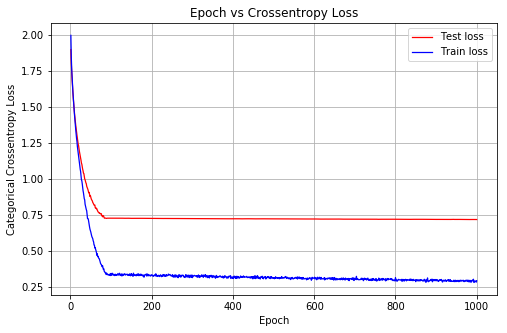

In [40]:
epochs = list(range(1,1000+1))
validation_loss = hist.history['val_loss']
train_loss = hist.history['loss']
plt.figure(figsize=(8,5))
plt.plot(epochs,validation_loss,'r',label='Test loss',linewidth=1.25)
plt.plot(epochs,train_loss,'b',label='Train loss',linewidth=1.25)
plt.ylabel('Categorical Crossentropy Loss')
plt.xlabel('Epoch')
plt.title('Epoch vs Crossentropy Loss')
plt.grid()
plt.legend()
plt.show()

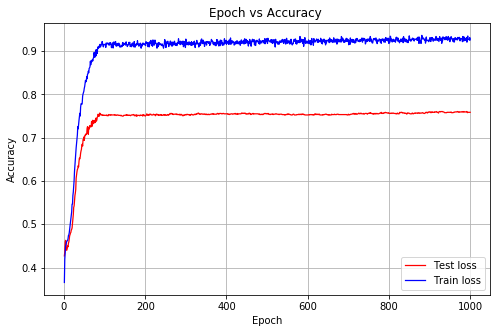

In [41]:
epochs = list(range(1,1000+1))
validation_loss = hist.history['val_acc']
train_loss = hist.history['acc']
plt.figure(figsize=(8,5))
plt.plot(epochs,validation_loss,'r',label='Test loss',linewidth=1.25)
plt.plot(epochs,train_loss,'b',label='Train loss',linewidth=1.25)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Epoch vs Accuracy ')
plt.grid()
plt.legend()
plt.show()

<h2>Architecture-3 : 2-Layers Dense</h2>
<h2>Dense(500) - Dense(200) - Dense(output) ->> Adam+Dropout(0.3)+Batch_Normalization</h2>

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
model = Sequential()
model.add(Dense(500, input_dim=320, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(9, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.2, min_lr=0.00001)


hist=model.fit(X_train,y_train,verbose=2,batch_size=120,validation_data=(X_test, y_test),
               callbacks=[learning_rate_reduction],shuffle=True,epochs=250)
# evalute model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 2667 samples, validate on 1143 samples
Epoch 1/250
 - 2s - loss: 1.9609 - acc: 0.3956 - val_loss: 1.4024 - val_acc: 0.5669
Epoch 2/250
 - 0s - loss: 1.3538 - acc: 0.5467 - val_loss: 1.1890 - val_acc: 0.6037
Epoch 3/250
 - 0s - loss: 1.1563 - acc: 0.6190 - val_loss: 1.0817 - val_acc: 0.6465
Epoch 4/250
 - 0s - loss: 1.0474 - acc: 0.6513 - val_loss: 1.0175 - val_acc: 0.6544
Epoch 5/250
 - 0s - loss: 0.9448 - acc: 0.6892 - val_loss: 0.9523 - val_acc: 0.6737
Epoch 6/250
 - 0s - loss: 0.8518 - acc: 0.7098 - val_loss: 0.8842 - val_acc: 0.6833
Epoch 7/250
 - 0s - loss: 0.7931 - acc: 0.7315 - val_loss: 0.8639 - val_acc: 0.7069
Epoch 8/250
 - 0s - loss: 0.7300 - acc: 0.7585 - val_loss: 0.8570 - val_acc: 0.7078
Epoch 9/250
 - 0s - loss: 0.7008 - acc: 0.7608 - val_loss: 0.8437 - val_acc: 0.6990
Epoch 10/250
 - 0s - loss: 0.6539 - acc: 0.7705 - val_loss: 0.7819 - val_acc: 0.7305
Epoch 11/250
 - 0s - loss: 0.6087 - acc: 0.7825 - val_loss: 0.7717 - val_acc: 0.7358
Epoch 12/250
 - 0s - loss:

Epoch 95/250
 - 0s - loss: 0.2161 - acc: 0.9310 - val_loss: 0.6004 - val_acc: 0.8171
Epoch 96/250
 - 0s - loss: 0.2184 - acc: 0.9310 - val_loss: 0.6010 - val_acc: 0.8171
Epoch 97/250
 - 0s - loss: 0.2127 - acc: 0.9243 - val_loss: 0.6017 - val_acc: 0.8145
Epoch 98/250
 - 0s - loss: 0.2155 - acc: 0.9325 - val_loss: 0.6025 - val_acc: 0.8163
Epoch 99/250
 - 0s - loss: 0.2278 - acc: 0.9243 - val_loss: 0.6018 - val_acc: 0.8180
Epoch 100/250
 - 0s - loss: 0.2065 - acc: 0.9329 - val_loss: 0.6017 - val_acc: 0.8189
Epoch 101/250
 - 0s - loss: 0.2208 - acc: 0.9284 - val_loss: 0.6007 - val_acc: 0.8171
Epoch 102/250
 - 0s - loss: 0.2133 - acc: 0.9303 - val_loss: 0.5997 - val_acc: 0.8163
Epoch 103/250
 - 0s - loss: 0.2136 - acc: 0.9314 - val_loss: 0.5996 - val_acc: 0.8163
Epoch 104/250
 - 0s - loss: 0.2113 - acc: 0.9333 - val_loss: 0.6003 - val_acc: 0.8163
Epoch 105/250
 - 0s - loss: 0.2013 - acc: 0.9393 - val_loss: 0.6008 - val_acc: 0.8163
Epoch 106/250
 - 0s - loss: 0.2173 - acc: 0.9299 - val_loss

Epoch 191/250
 - 0s - loss: 0.1910 - acc: 0.9415 - val_loss: 0.5974 - val_acc: 0.8189
Epoch 192/250
 - 0s - loss: 0.1915 - acc: 0.9419 - val_loss: 0.5973 - val_acc: 0.8171
Epoch 193/250
 - 0s - loss: 0.1865 - acc: 0.9396 - val_loss: 0.5973 - val_acc: 0.8171
Epoch 194/250
 - 0s - loss: 0.1867 - acc: 0.9423 - val_loss: 0.5970 - val_acc: 0.8198
Epoch 195/250
 - 0s - loss: 0.1840 - acc: 0.9438 - val_loss: 0.5959 - val_acc: 0.8206
Epoch 196/250
 - 0s - loss: 0.1905 - acc: 0.9389 - val_loss: 0.5954 - val_acc: 0.8215
Epoch 197/250
 - 0s - loss: 0.1782 - acc: 0.9453 - val_loss: 0.5960 - val_acc: 0.8215
Epoch 198/250
 - 0s - loss: 0.1855 - acc: 0.9434 - val_loss: 0.5961 - val_acc: 0.8198
Epoch 199/250
 - 0s - loss: 0.1902 - acc: 0.9385 - val_loss: 0.5961 - val_acc: 0.8206
Epoch 200/250
 - 0s - loss: 0.2009 - acc: 0.9348 - val_loss: 0.5961 - val_acc: 0.8198
Epoch 201/250
 - 0s - loss: 0.1869 - acc: 0.9385 - val_loss: 0.5965 - val_acc: 0.8224
Epoch 202/250
 - 0s - loss: 0.1824 - acc: 0.9419 - val

In [24]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5952900168359645
Test accuracy: 0.8215223095548434


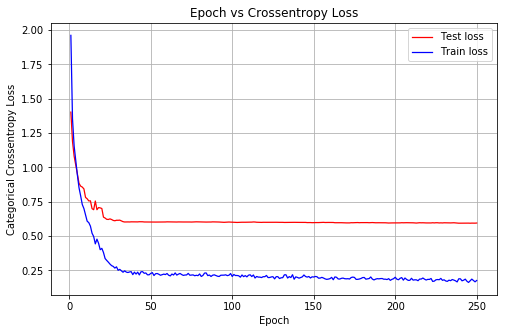

In [26]:
epochs = list(range(1,250+1))
validation_loss = hist.history['val_loss']
train_loss = hist.history['loss']
plt.figure(figsize=(8,5))
plt.plot(epochs,validation_loss,'r',label='Test loss',linewidth=1.25)
plt.plot(epochs,train_loss,'b',label='Train loss',linewidth=1.25)
plt.ylabel('Categorical Crossentropy Loss')
plt.xlabel('Epoch')
plt.title('Epoch vs Crossentropy Loss')
plt.grid()
plt.legend()
plt.show()

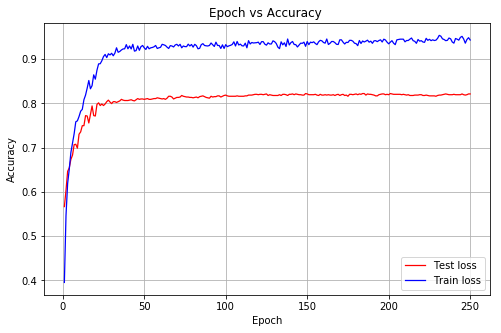

In [27]:
epochs = list(range(1,250+1))
validation_loss = hist.history['val_acc']
train_loss = hist.history['acc']
plt.figure(figsize=(8,5))
plt.plot(epochs,validation_loss,'r',label='Test loss',linewidth=1.25)
plt.plot(epochs,train_loss,'b',label='Train loss',linewidth=1.25)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Epoch vs Accuracy ')
plt.grid()
plt.legend()
plt.show()

**Observaton:**
   * Deep learning models perform better on Engineered Features than on Raw Data.
   * Deep Learning model Slightly overfit for data and due to imbalance of class labels.
   * Trying Other Complex models or deep layer networks may yield more Accuracy.